In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
import random

In [3]:
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the nbumber of labes."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the nbumber of labes."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

11493376/11490434 [==============================] - 0s 0us/step


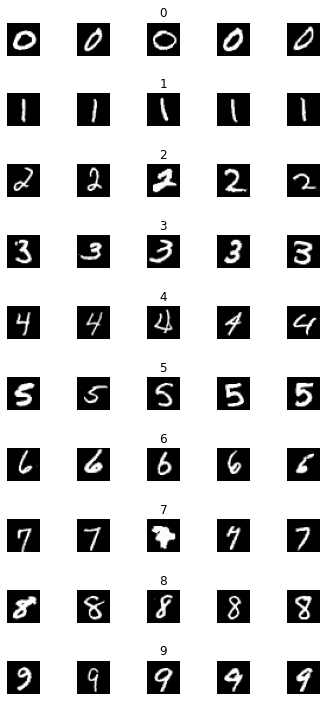

In [5]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

Text(0, 0.5, 'Number of images')

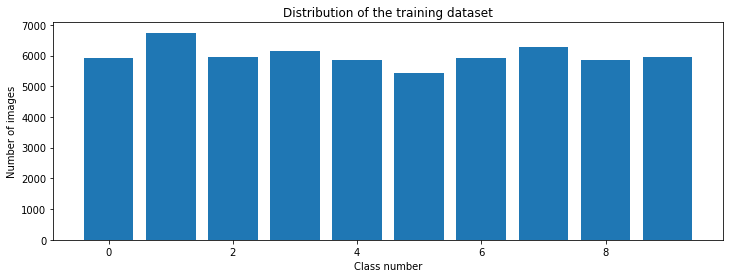

In [6]:
plt.figure(figsize =(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
X_train = X_train /255
X_test = X_test/255

In [9]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [10]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=num_pixels, activation="relu",))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(lr=0.01), loss = "categorical_crossentropy", metrics=["accuracy"])
  return model


In [11]:
#acc to accuracy

#val_acc to val_accuracy

In [12]:
model = create_model()

KeyboardInterrupt: ignored

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle= 1)

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['loss', 'val_loss'])
plt.title("Loss")
plt.xlabel("epoch")

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(['accuracy', 'val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print("Test Score:", score[0])
print("Test accuracy:", score[1])

In [ ]:
import requests
from PIL import Image
url = "https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png"
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [ ]:
import cv2
img_array = np.asarray(img)

resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))


In [ ]:
image = image / 255
image = image.reshape(1,784)


In [ ]:
#prediction = model.predict_classes(image)
prediction = np.argmax(model.predict(image), axis=-1)
print("predicted digit:", str(prediction))